In [21]:
import sys
import glob
import yaml
import h5py
import pyart
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../scripts')
import core
from analyse import aname, bname

In [56]:
win=100
nbasis=15
exp = 'nat8a'
stim_info = pd.read_csv(f"../inputs/stimuli/{exp}-info.csv")
spectrograms = pd.read_csv(f"../build/{exp}/spectrograms.csv", index_col=[0,1])
motifs = stim_info.motif.unique()
gap_info = stim_info[stim_info.type=='gap'].groupby(['motif','gap']).first()[['gap_start', 'gap_stop','full']]
gap_info['early'] = False
gap_info.loc[gap_info.groupby('motif').apply(
    lambda x: x.gap_start.idxmin()
).values, 'early'] = True

with open(f"../inputs/nat8-familiarity-coding.yml") as famfile:
    familiarity = yaml.safe_load(famfile)
with open(f'../inputs/nat8-stimulus-coding.yml') as coding:
    names = yaml.safe_load(coding)
    names = pd.DataFrame.from_dict(names).stack().to_frame('nat8b').droplevel(0)

results = pd.read_csv(f"../output/{exp}/distances-nat8a.csv", index_col=[0])
results = results[results.fam.isin(['familiar','unfamiliar','beta'])].set_index(['fam','comp','motif','gap'])

In [90]:
exp = 'nat8a'
stim_info = pd.read_csv(f"../inputs/stimuli/{exp}-info.csv")
motifs = stim_info.motif.unique()
gap_info = stim_info[stim_info.type=='gap'].groupby(['motif','gap']).first()[['gap_start', 'gap_stop','full']]
gap_info['early'] = False
gap_info.loc[gap_info.groupby('motif').apply(
    lambda x: x.gap_start.idxmin()
).values, 'early'] = True

In [91]:
gap_info

gap_start  gap_stop   full  early
motif gap                                   
B189  1.0      113.0     209.0   True   True
      2.0      456.0     556.0  False  False
B2    1.0      748.0     824.0  False  False
      2.0      354.0     432.0   True   True
B30   1.0      329.0     402.0  False  False
      2.0      161.0     219.0   True   True
B72   1.0      608.0     670.0   True  False
      2.0      414.0     505.0  False   True
O129  1.0      372.0     465.0  False   True
      2.0      582.0     682.0   True  False
R180  1.0      328.0     428.0   True   True
      2.0      823.0     881.0  False  False
R253  1.0      512.0     612.0   True  False
      2.0      419.0     497.0  False   True
R56   1.0      629.0     729.0  False   True
      2.0      810.0     876.0   True  False

In [40]:
colors = {
    'C': 'navy',
    'G': 'seagreen',
    'N': 'orangered',
    'GB':'crimson',
    'CB':'darkorchid',
    'GM':'mediumturquoise',
    'CM':'darkcyan',
}
cmap = f'pyart_balance'

In [36]:
names

,nat8b
B189,nat8mk0
R56,nat8mk1
R180,nat8mk2
B30,nat8mk3
B72,nat8mk4
B2,nat8mk5
O129,nat8mk6
R253,nat8mk7


In [37]:
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 7
plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['ytick.minor.width'] = 2

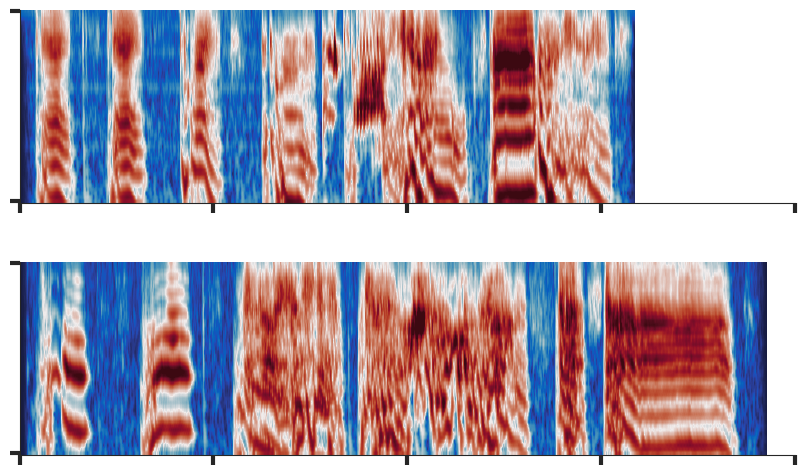

In [41]:
sns.set_style('white')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.minor.width'] = 2

fig, ax = plt.subplots(2,1, figsize=(10,6))

for im, m in enumerate(motifs[4:6]):
    # ax = plt.figure(figsize=(10,3)).add_subplot()
    stim = aname(m, 'C', 0)
    spec = spectrograms.loc[stim]
    tmax = spec.index.max()
    ticks = np.arange(0,tmax, 300)
    ax[im].imshow(
        spec.T.iloc[::-1], cmap=cmap, aspect=6, vmin=0, vmax=3
    )
    # for g, row in gaps.loc[m].iterrows():
    #     ga, gb = row
    #     ax[im].fill_between([ga, gb], y1=0, y2=49, color='gold', alpha=0.3)
    sns.despine(ax=ax[im], top=True, right=True)
    ax[im].set_xticks([0,300,600,900,1200],[])
    ax[im].set_yticks([0,49], [])
    ax[im].set_xlim(0,1200)

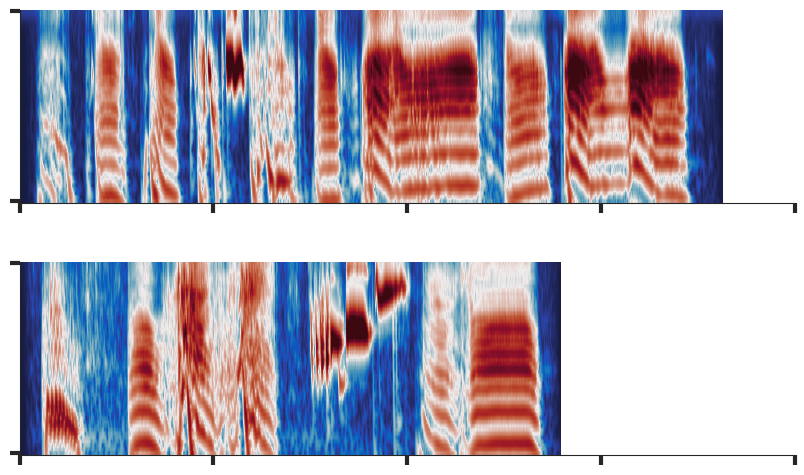

In [42]:
fig, ax = plt.subplots(2,1, figsize=(10,6))

for im, m in enumerate(motifs[1:3]):
    # ax = plt.figure(figsize=(10,3)).add_subplot()
    stim = aname(m, 'C', 0)
    spec = spectrograms.loc[stim]
    tmax = spec.index.max()
    ticks = np.arange(0,tmax, 300)
    ax[im].imshow(
        spec.T.iloc[::-1], cmap=cmap, aspect=6, vmin=0, vmax=3
    )
    # for g, row in gaps.loc[m].iterrows():
    #     ga, gb = row
    #     ax[im].fill_between([ga, gb], y1=0, y2=49, color='gold', alpha=0.3)
    sns.despine(ax=ax[im], top=True, right=True)
    ax[im].set_xticks([0,300,600,900,1200],[])
    ax[im].set_yticks([0,49], [])
    ax[im].set_xlim(0,1200)

In [44]:
p1 = [0,2.5,5]
p2 = [1,3.5,6]
sns.set_style('whitegrid')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['ytick.minor.width'] = 2

In [45]:
e = gap_info[gap_info.early==1].index
l = gap_info[gap_info.early==0].index

f = gap_info[gap_info.full==1].index
p = gap_info[gap_info.full==0].index

In [ ]:
p1

In [59]:
results.loc[cond].unstack(0).droplevel(0,axis=1).loc[e]['GBC']

motif  gap
B189   1.0    1.102486
B2     2.0    0.975485
B30    2.0    0.841433
B72    2.0    1.018356
O129   1.0    1.102516
R180   1.0    0.581270
R253   2.0    0.582973
R56    1.0    0.706793
Name: GBC, dtype: float64

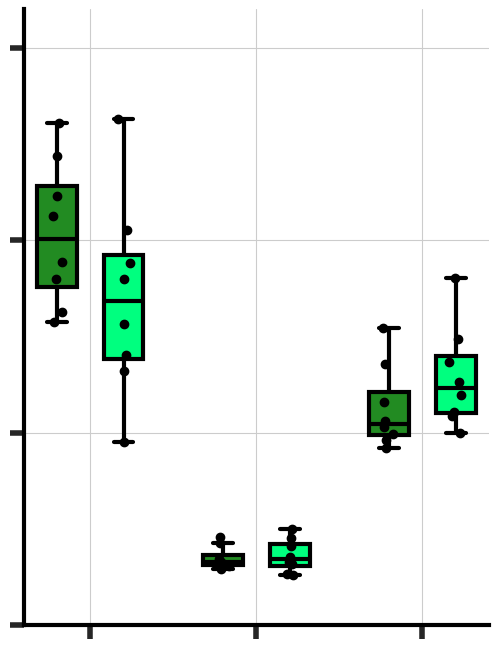

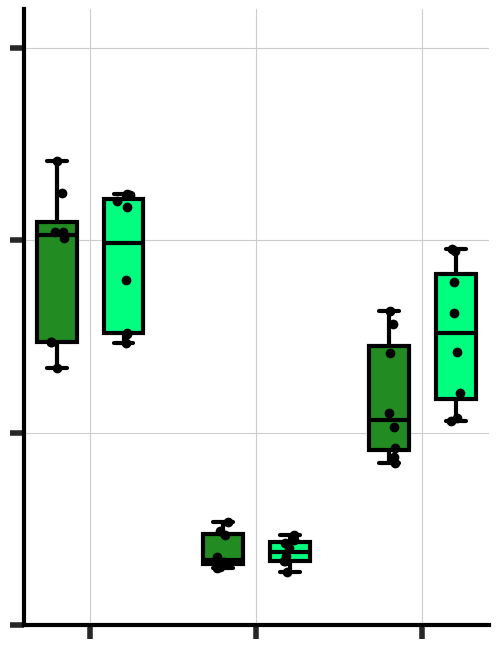

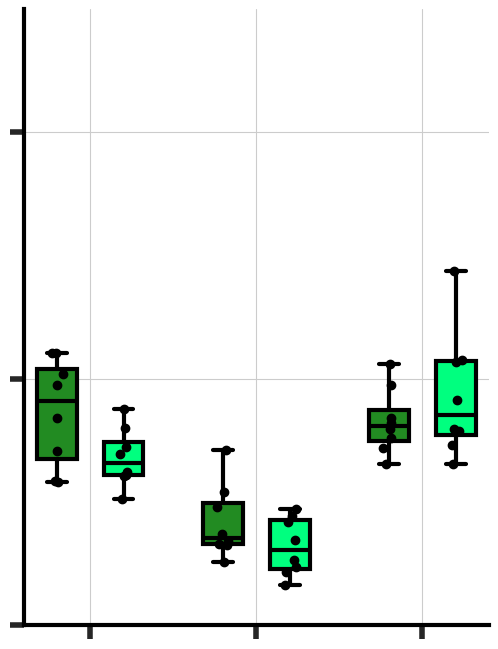

In [62]:
for cond in ['familiar', 'unfamiliar', 'beta']:
    ax = plt.figure(figsize=(6,8)).add_subplot()
    early_data = results.loc[cond].unstack(0).droplevel(0,axis=1).loc[e]
    late_data = results.loc[cond].unstack(0).droplevel(0,axis=1).loc[l]
    bp1 = ax.boxplot(
        early_data,
        patch_artist=True,
        positions=p1,
        showfliers=False,
        widths=0.6
    )
    bp2 = ax.boxplot(
        late_data,
        patch_artist=True,
        positions=p2,
        showfliers=False,
        widths=0.6
    )
    for i, ic in enumerate(['GBC','GBCB','GBN']):
        ax.plot(
            np.repeat(p1[i], 8) + np.random.uniform(-0.1,0.1,8),
            early_data[ic], marker='o', ls='', alpha=1, color='black',
            zorder=10
        )
        ax.plot(
            np.repeat(p2[i], 8) + np.random.uniform(-0.1,0.1,8),
            late_data[ic], marker='o', ls='', alpha=1, color='black',
            zorder=10
        )

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp1[element], color='black', lw=3)
        plt.setp(bp2[element], color='black', lw=3)
    
    for patch in bp1['boxes']:
        patch.set(facecolor='forestgreen')
    for patch in bp2['boxes']:
        patch.set(facecolor='springgreen')

    sns.despine(ax=ax, top=True, right=True)
    plt.setp(ax.spines.values(), lw=3, color='black')
    if cond!='beta':
        ax.set_xticks([0.5,3,5.5], [])
        ax.set_yticks([0,0.5,1,1.5], [])
        ax.set_ylim(0,1.6)
        ax.set_xlim(-0.5, 6.5)
    else:
        ax.set_xticks([0.5,3,5.5], [])
        ax.set_yticks([0,1,2], [])
        ax.set_ylim(0,2.5)
        ax.set_xlim(-0.5, 6.5)

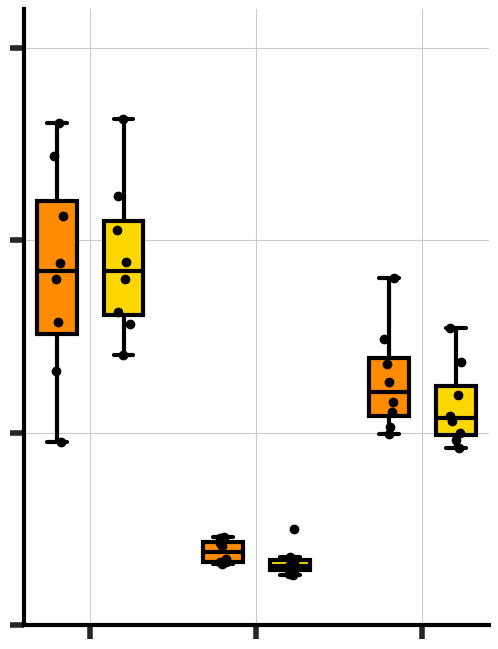

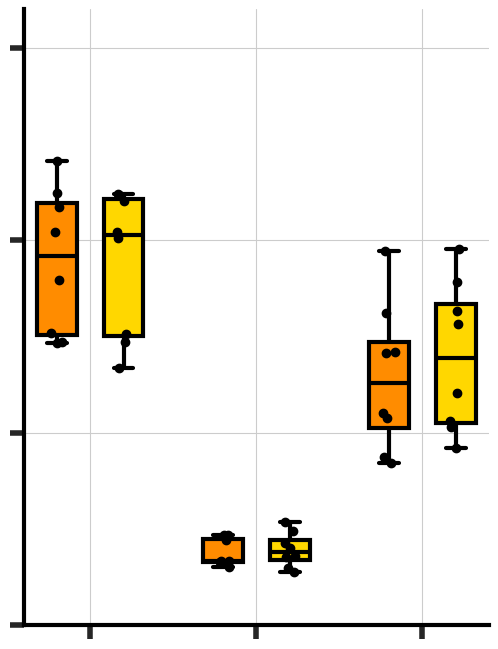

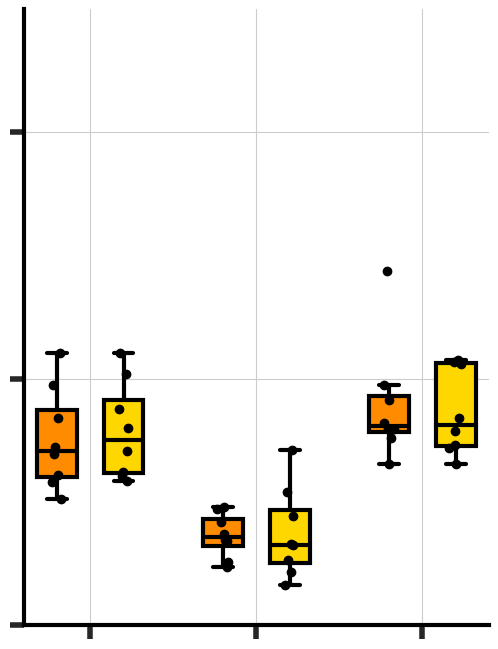

In [64]:
for cond in ['familiar', 'unfamiliar', 'beta']:
    ax = plt.figure(figsize=(6,8)).add_subplot()
    full_data = results.loc[cond].unstack(0).droplevel(0,axis=1).loc[f]
    part_data = results.loc[cond].unstack(0).droplevel(0,axis=1).loc[p]
    bp1 = ax.boxplot(
        full_data,
        patch_artist=True,
        positions=p1,
        showfliers=False,
        widths=0.6
    )
    bp2 = ax.boxplot(
        part_data,
        patch_artist=True,
        positions=p2,
        showfliers=False,
        widths=0.6
    )
    for i, ic in enumerate(['GBC','GBCB','GBN']):
        ax.plot(
            np.repeat(p1[i], 8) + np.random.uniform(-0.1,0.1,8),
            full_data[ic], marker='o', ls='', alpha=1, color='black',
            zorder=10
        )
        ax.plot(
            np.repeat(p2[i], 8) + np.random.uniform(-0.1,0.1,8),
            part_data[ic], marker='o', ls='', alpha=1, color='black',
            zorder=10
        )

    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp1[element], color='black', lw=3)
        plt.setp(bp2[element], color='black', lw=3)
    
    for patch in bp1['boxes']:
        patch.set(facecolor='darkorange')
    for patch in bp2['boxes']:
        patch.set(facecolor='gold')

    sns.despine(ax=ax, top=True, right=True)
    plt.setp(ax.spines.values(), lw=3, color='black')
    if cond!='beta':
        ax.set_xticks([0.5,3,5.5], [])
        ax.set_yticks([0,0.5,1,1.5], [])
        ax.set_ylim(0,1.6)
        ax.set_xlim(-0.5, 6.5)
    else:
        ax.set_xticks([0.5,3,5.5], [])
        ax.set_yticks([0,1,2], [])
        ax.set_ylim(0,2.5)
        ax.set_xlim(-0.5, 6.5)


In [99]:
exp = 'nat8b'
stim_info = pd.read_csv(f"../inputs/stimuli/{exp}-info.csv")
spectrograms = pd.read_csv(f"../build/{exp}/spectrograms.csv", index_col=[0,1])
motifs = stim_info.motif.unique()
gap_info = stim_info[stim_info.type=='G'].groupby(['motif','gap']).first()[['gap_start', 'gap_stop','full']]
gap_info['early'] = False
gap_info.loc[gap_info.groupby('motif').apply(
    lambda x: x.gap_start.idxmin()
).values, 'early'] = True
results = pd.read_csv(f"../output/{exp}/distances-cohort.csv").set_index(['comp','motif','gap'])

In [100]:
gap_info.index = gap_info.index.set_levels([f"nat8mk{m}" for m in range(8)], level=0)
e = gap_info[gap_info.early==1].index
l = gap_info[gap_info.early==0].index

f = gap_info[gap_info.full==1].index
p = gap_info[gap_info.full==0].index
gap_info.head()

gap_start  gap_stop   full  early
motif   gap                                   
nat8mk0 1.0      113.0     209.0   True   True
        2.0      456.0     556.0  False  False
nat8mk1 1.0      629.0     729.0  False   True
        2.0      810.0     876.0   True  False
nat8mk2 1.0      328.0     428.0   True   True

(-0.5, 9.0)

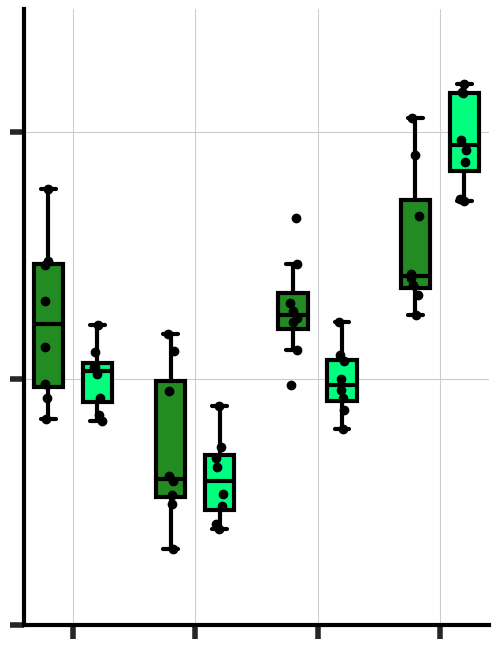

In [104]:
p1 = [0,2.5,5, 7.5]
p2 = [1,3.5,6, 8.5]
ax = plt.figure(figsize=(6,8)).add_subplot()
early_data = results.unstack(0).droplevel(0,axis=1).loc[e]
late_data = results.unstack(0).droplevel(0,axis=1).loc[l]
bp1 = ax.boxplot(
    early_data[['GBC','GBCB','GBGM','GBN']],
    patch_artist=True,
    positions=p1,
    showfliers=False,
    widths=0.6
)
bp2 = ax.boxplot(
    late_data[['GBC','GBCB','GBGM','GBN']],
    patch_artist=True,
    positions=p2,
    showfliers=False,
    widths=0.6
)
for i, ic in enumerate(['GBC','GBCB','GBGM','GBN']):
    ax.plot(
        np.repeat(p1[i], 8) + np.random.uniform(-0.1,0.1,8),
        early_data[ic], marker='o', ls='', alpha=1, color='black',
        zorder=10
    )
    ax.plot(
        np.repeat(p2[i], 8) + np.random.uniform(-0.1,0.1,8),
        late_data[ic], marker='o', ls='', alpha=1, color='black',
        zorder=10
    )

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp1[element], color='black', lw=3)
    plt.setp(bp2[element], color='black', lw=3)

for patch in bp1['boxes']:
    patch.set(facecolor='forestgreen')
for patch in bp2['boxes']:
    patch.set(facecolor='springgreen')

sns.despine(ax=ax, top=True, right=True)
plt.setp(ax.spines.values(), lw=3, color='black')
ax.set_xticks([0.5,3,5.5,8], [])
ax.set_yticks([0,1,2], [])
ax.set_ylim(0,2.5)
ax.set_xlim(-0.5, 9)

(-0.5, 9.0)

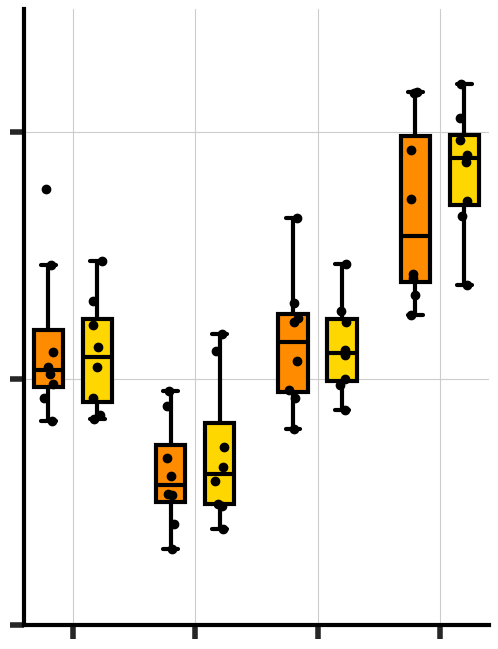

In [105]:
p1 = [0,2.5,5, 7.5]
p2 = [1,3.5,6, 8.5]
ax = plt.figure(figsize=(6,8)).add_subplot()
full_data = results.unstack(0).droplevel(0,axis=1).loc[f]
part_data = results.unstack(0).droplevel(0,axis=1).loc[p]
bp1 = ax.boxplot(
    full_data[['GBC','GBCB','GBGM','GBN']],
    patch_artist=True,
    positions=p1,
    showfliers=False,
    widths=0.6
)
bp2 = ax.boxplot(
    part_data[['GBC','GBCB','GBGM','GBN']],
    patch_artist=True,
    positions=p2,
    showfliers=False,
    widths=0.6
)
for i, ic in enumerate(['GBC','GBCB','GBGM','GBN']):
    ax.plot(
        np.repeat(p1[i], 8) + np.random.uniform(-0.1,0.1,8),
        full_data[ic], marker='o', ls='', alpha=1, color='black',
        zorder=10
    )
    ax.plot(
        np.repeat(p2[i], 8) + np.random.uniform(-0.1,0.1,8),
        part_data[ic], marker='o', ls='', alpha=1, color='black',
        zorder=10
    )

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp1[element], color='black', lw=3)
    plt.setp(bp2[element], color='black', lw=3)

for patch in bp1['boxes']:
    patch.set(facecolor='darkorange')
for patch in bp2['boxes']:
    patch.set(facecolor='gold')

sns.despine(ax=ax, top=True, right=True)
plt.setp(ax.spines.values(), lw=3, color='black')
ax.set_xticks([0.5,3,5.5,8], [])
ax.set_yticks([0,1,2], [])
ax.set_ylim(0,2.5)
ax.set_xlim(-0.5, 9)

In [107]:
exp = 'synth8b'
stim_info = pd.read_csv(f"../inputs/stimuli/{exp}-info.csv")
spectrograms = pd.read_csv(f"../build/{exp}/spectrograms.csv", index_col=[0,1])
motifs = stim_info.motif.unique()
gap_info = stim_info[stim_info.type=='G'].groupby(['motif','gap']).first()[['gap_start', 'gap_stop']]
gap_info['early'] = False
gap_info.loc[gap_info.groupby('motif').apply(
    lambda x: x.gap_start.idxmin()
).values, 'early'] = True
results = pd.read_csv(f"../output/{exp}/distances-cohort.csv").set_index(['comp','motif','gap'])

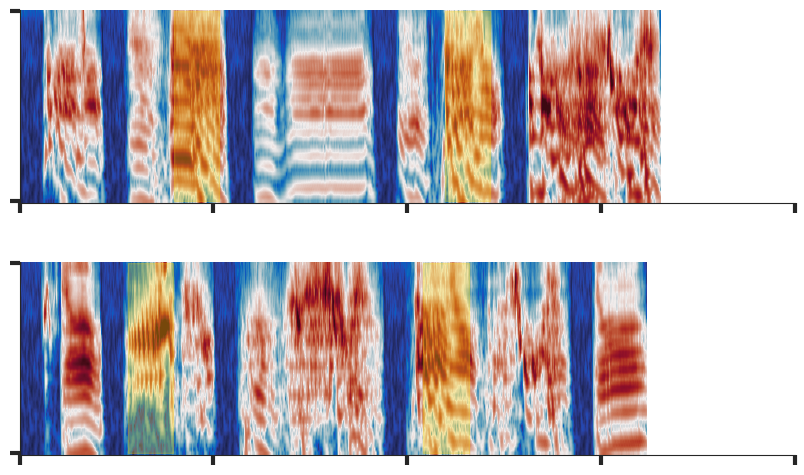

In [112]:
sns.set_style('white')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.minor.width'] = 2

fig, ax = plt.subplots(2,1, figsize=(10,6))

for im, m in enumerate(motifs[2:4]):
    # ax = plt.figure(figsize=(10,3)).add_subplot()
    stim = bname(m, 'C', 0)
    spec = spectrograms.loc[stim]
    tmax = spec.index.max()
    ticks = np.arange(0,tmax, 300)
    ax[im].imshow(
        spec.T.iloc[::-1], cmap=cmap, aspect=6, vmin=0, vmax=3
    )
    for g, row in gap_info.loc[m].iterrows():
        ga, gb = row[['gap_start','gap_stop']]
        ax[im].fill_between([ga, gb], y1=0, y2=49, color='gold', alpha=0.3)
    sns.despine(ax=ax[im], top=True, right=True)
    ax[im].set_xticks([0,300,600,900,1200],[])
    ax[im].set_yticks([0,49], [])
    ax[im].set_xlim(0,1200)

In [117]:
e = gap_info[gap_info.early==1].index
l = gap_info[gap_info.early==0].index

(-0.5, 9.0)

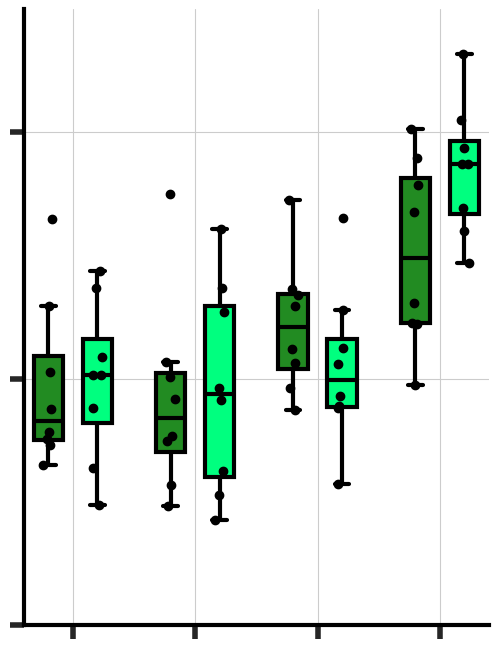

In [119]:
p1 = [0,2.5,5, 7.5]
p2 = [1,3.5,6, 8.5]
ax = plt.figure(figsize=(6,8)).add_subplot()
early_data = results.unstack(0).droplevel(0,axis=1).loc[e]
late_data = results.unstack(0).droplevel(0,axis=1).loc[l]
bp1 = ax.boxplot(
    early_data[['GBC','GBCB','GBGM','GBN']],
    patch_artist=True,
    positions=p1,
    showfliers=False,
    widths=0.6
)
bp2 = ax.boxplot(
    late_data[['GBC','GBCB','GBGM','GBN']],
    patch_artist=True,
    positions=p2,
    showfliers=False,
    widths=0.6
)
for i, ic in enumerate(['GBC','GBCB','GBGM','GBN']):
    ax.plot(
        np.repeat(p1[i], 8) + np.random.uniform(-0.1,0.1,8),
        early_data[ic], marker='o', ls='', alpha=1, color='black',
        zorder=10
    )
    ax.plot(
        np.repeat(p2[i], 8) + np.random.uniform(-0.1,0.1,8),
        late_data[ic], marker='o', ls='', alpha=1, color='black',
        zorder=10
    )

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp1[element], color='black', lw=3)
    plt.setp(bp2[element], color='black', lw=3)

for patch in bp1['boxes']:
    patch.set(facecolor='forestgreen')
for patch in bp2['boxes']:
    patch.set(facecolor='springgreen')

sns.despine(ax=ax, top=True, right=True)
plt.setp(ax.spines.values(), lw=3, color='black')
ax.set_xticks([0.5,3,5.5,8], [])
ax.set_yticks([0,1,2], [])
ax.set_ylim(0,2.5)
ax.set_xlim(-0.5, 9)